<a href="https://colab.research.google.com/github/netliar/Contribute-To-This-Project/blob/master/CODE_TUBES_SA_KosTerdekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS BESAR : STRATEGI ALGORITMA

### ANGGOTA KELOMPOK


---

Nama Anggota Kelompok:
1. Falah Akbar					    (1301220080)
2. Antonius Vincent Jung			(1301223436)
3. Muhammad Iqbal Rasyid			(1301223241)
4. Marcel Epafroditus Hutahaean		(1301220165)
5. Sigit Hadi Putranto				(1301223148)





# PROBLEM

### Perbandingan Algoritma Mencari Dua Rumah Kos dengan Jarak Ketertanggaaan Terdekat untuk Memudahkan Silaturahmi Kelompok


### Deskripsi Masalah
Rumah kos adalah tempat tinggal yang disewakan kepada penyewa dalam kurung waktu tertentu sesuai ketentuan. Rumah kos umumnya tersedia di area perkotaan yang dekat dengan universitas atau perkantoran, dalam satu area terdapat banyak rumah kos yang bertebaran dengan fasilitas dan biaya sewa yang beragam. Tempat tinggal yang disewakan sendiri umumnya hanya berbasis 1 kamar utama yang hanya boleh diisi oleh 1 individu. Berbeda dengan apartemen, rumah kos umumnya hanya menawarkan slot kamar yang lebih sedikit.


Dalam tugas besar ini, kami mengambil sebuah kasus di mana terdapat sekelompok mahasiswa yang terdiri dari 5 orang. Mereka ingin memilih tempat tinggal bersama agar mudah dalam berkomunikasi, belajar, dan aktivitas bersama lainnya. Namun dikarenakan kondisi mayoritas rumah kos sudah hampir penuh, satu kelompok ini harus terbelah menjadi dua kelompok yang lebih kecil sesuai kapasitas rumah kos yang tersedia. Maka dari itu, walaupun harus berpisah, setidaknya kelompok mahasiswa ini ingin mencari dua rumah kos yang jarak antarkeduanya terdekat atau terpendek.

Berikut beberapa asumsi yang diterapkan dalam kasus ini:
1. Kelompok ini pasti akan memilih 2 rumah kos
2. Semua pasangan rumah kos pasti bisa ditempati oleh 2 kelompok kecil dengan kombinasi formasi apapun
3. Jarak terdekat adalah jarak antar sepasang rumah kos


# Ilustrasi

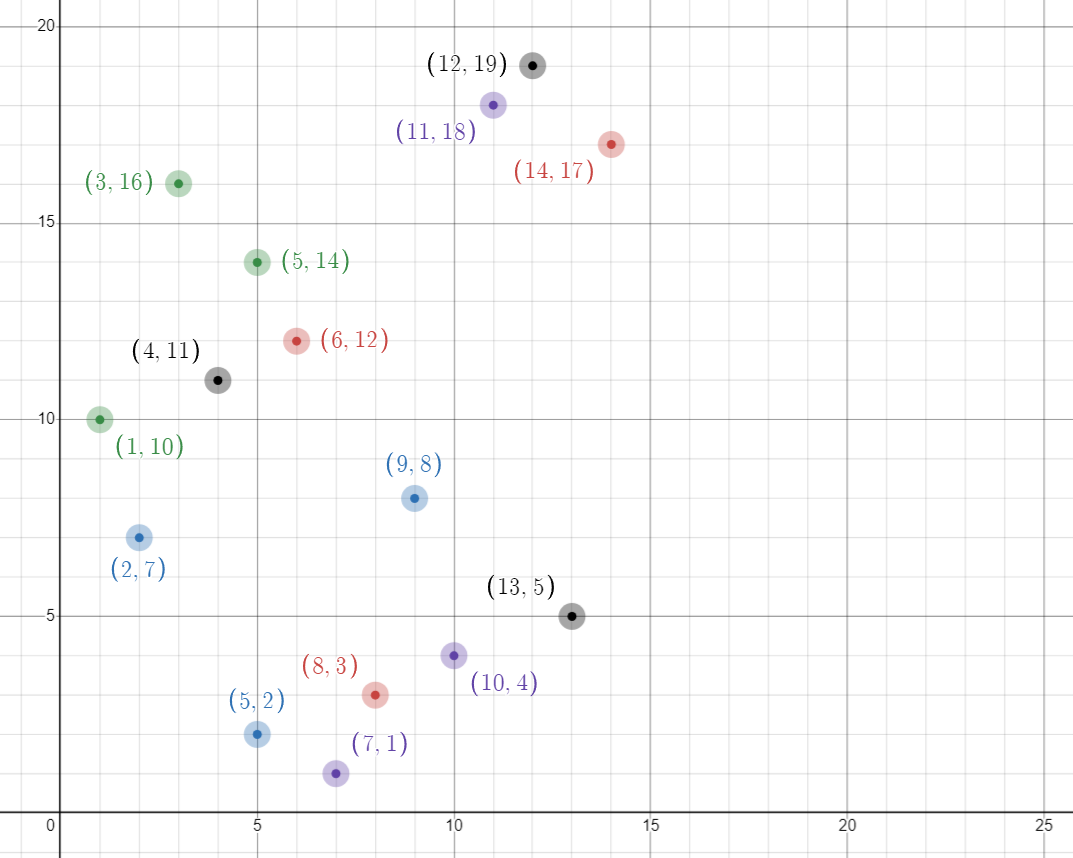

# Pendekatan yang Digunakan
Ada beberapa pendekatan algoritmik untuk menyelesaikan masalah ini. Salah satu pendekatan yang sederhana tetapi lambat adalah dengan menggunakan algoritma brute force yang memeriksa setiap pasangan titik dan menghitung jaraknya, yang memiliki kompleksitas waktu 𝑂(𝑛^2) dalam kasus terburuk. Namun, ada juga pendekatan yang lebih efisien seperti algoritma divide and conquer, yang memiliki kompleksitas waktu 𝑂(𝑛 log 𝑛) dengan membagi masalah menjadi submasalah yang lebih kecil.

Dalam algoritma divide and conquer, langkah-langkahnya mencakup membagi himpunan titik menjadi dua bagian, menemukan pasangan titik terdekat di setiap bagian, dan kemudian mencari pasangan titik terdekat yang melintasi garis pembagi. Solusi optimal untuk masalah "Closest Pair of Points" dapat dicapai dengan menggunakan algoritma ini, yang memungkinkan penyelesaian yang cepat dan efisien bahkan untuk himpunan titik yang besar.

### Solusi dalam Brute Force
Dalam metode brute force, kita memeriksa jarak antara setiap pasangan titik dan memilih pasangan dengan jarak terkecil. Misalnya, jika kita memiliki 15 titik dalam bidang dua dimensi, akan ada total 105 pasangan titik yang harus diperiksa. Kemudian, kita menghitung jarak Euclidean antara setiap pasangan titik dan memilih pasangan dengan jarak terkecil sebagai pasangan titik terdekat. Proses ini memastikan bahwa tidak ada pasangan titik lain yang memiliki jarak yang lebih kecil.

### Gambar
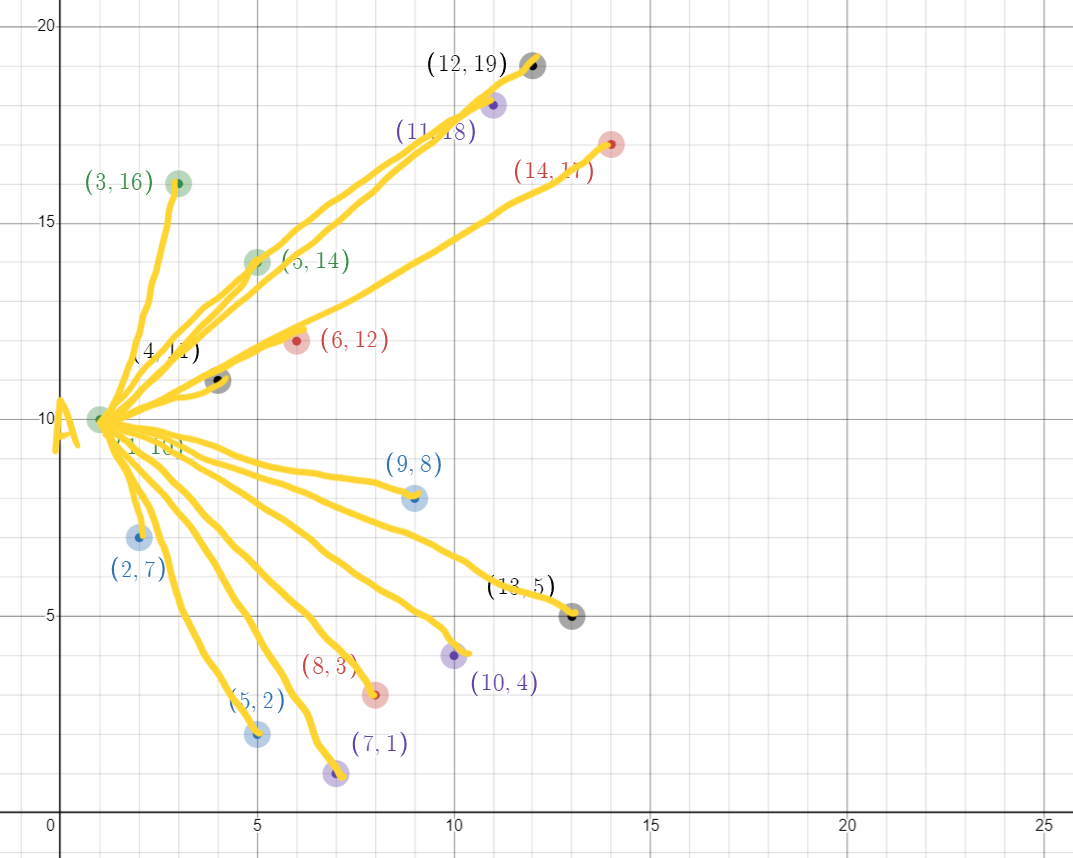

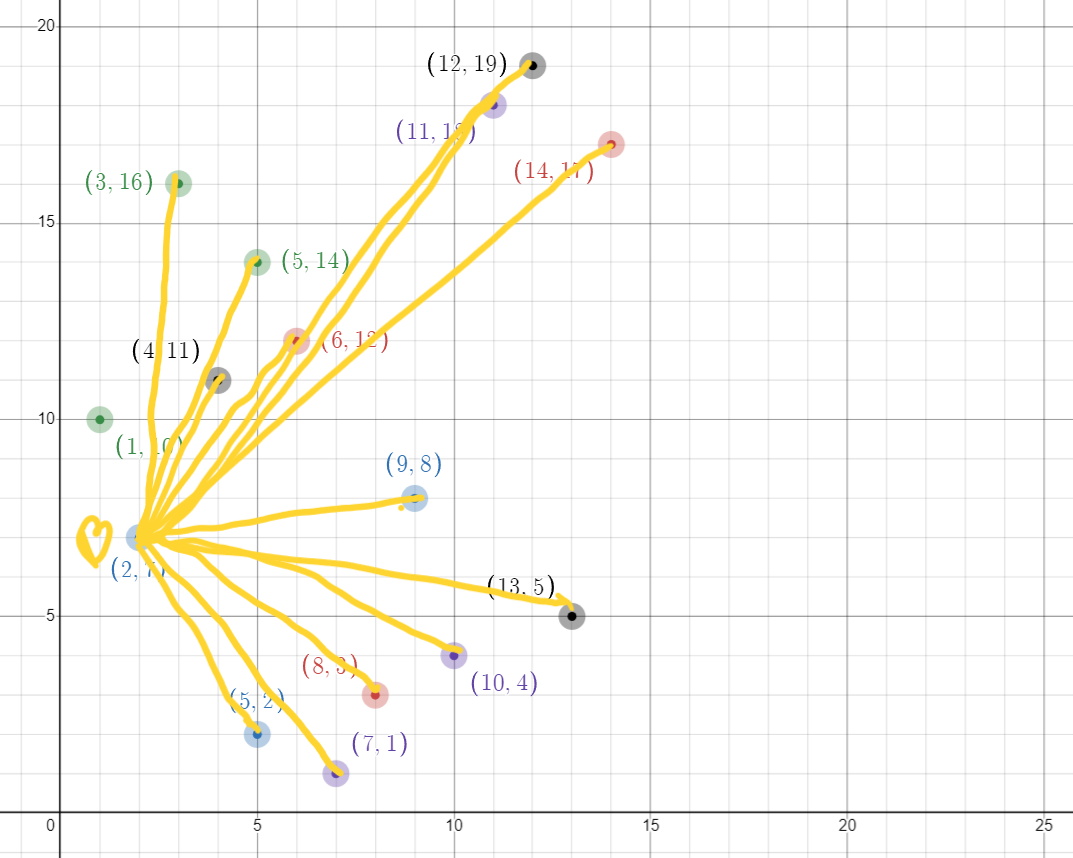

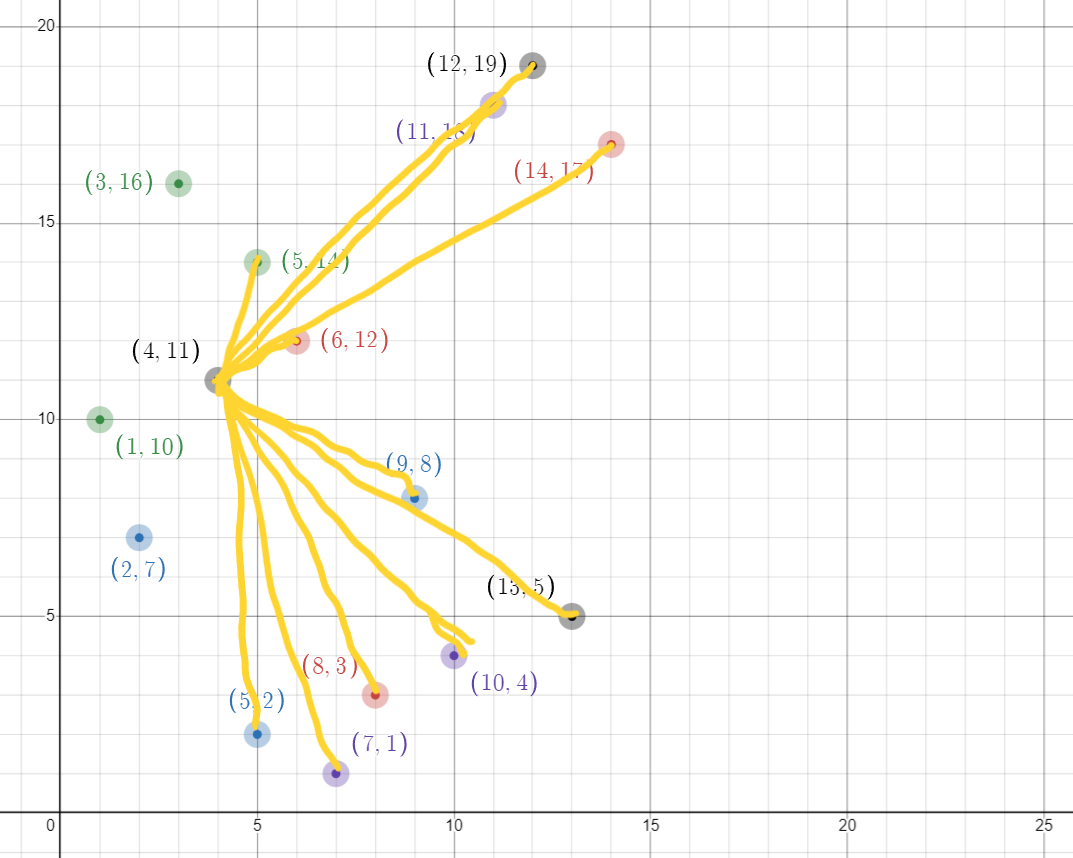

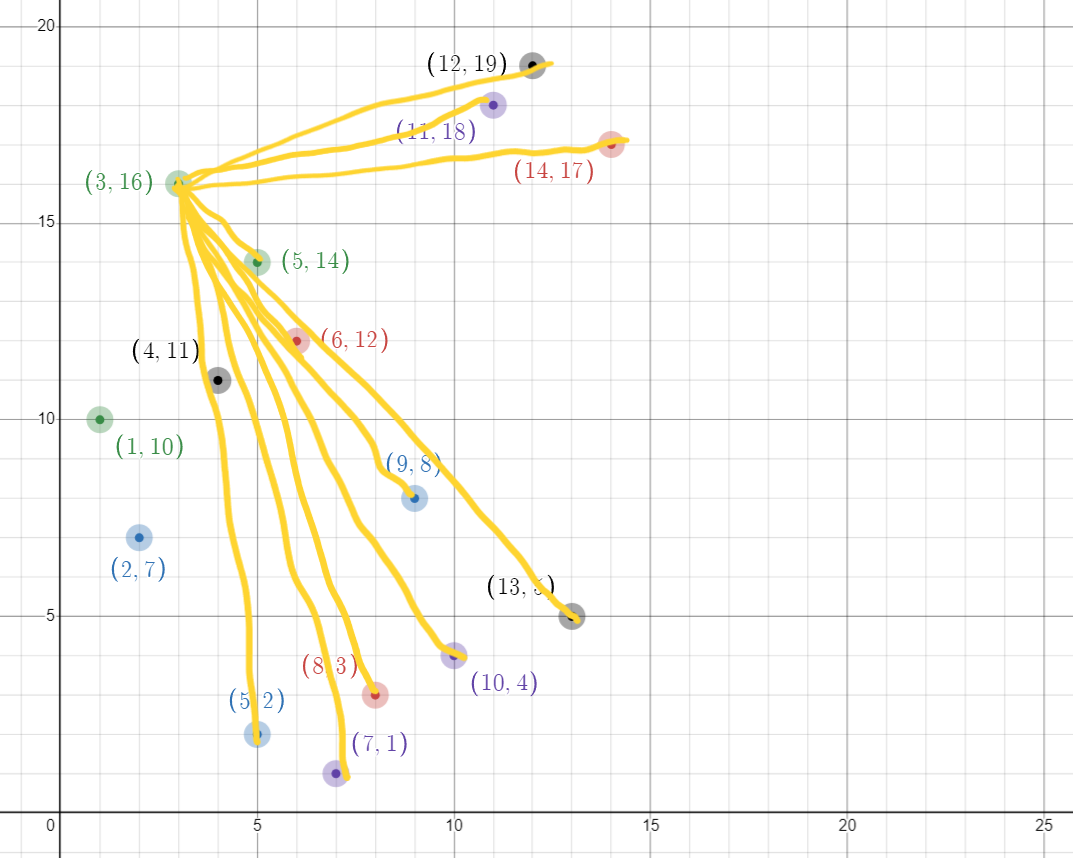

Dan seterusnya...

### Solusi dalam Divide and Conquer
Dalam metode divide and conquer, kita membagi himpunan titik menjadi dua setengah, mencari pasangan titik terdekat di setiap setengah, dan kemudian memeriksa pasangan titik yang melintasi garis pembagi antara kedua setengah. Misalnya, jika kita memiliki 15 titik dalam bidang dua dimensi, kita akan membaginya menjadi dua setengah (masing-masing 7 dan 8 titik), mencari pasangan terdekat di setiap setengah, dan kemudian memeriksa pasangan titik yang berada di sekitar garis pembagi antara dua setengah. Dengan menggunakan metode ini, kita dapat menemukan pasangan titik terdekat secara efisien, bahkan dengan jumlah titik yang besar.

### Gambar
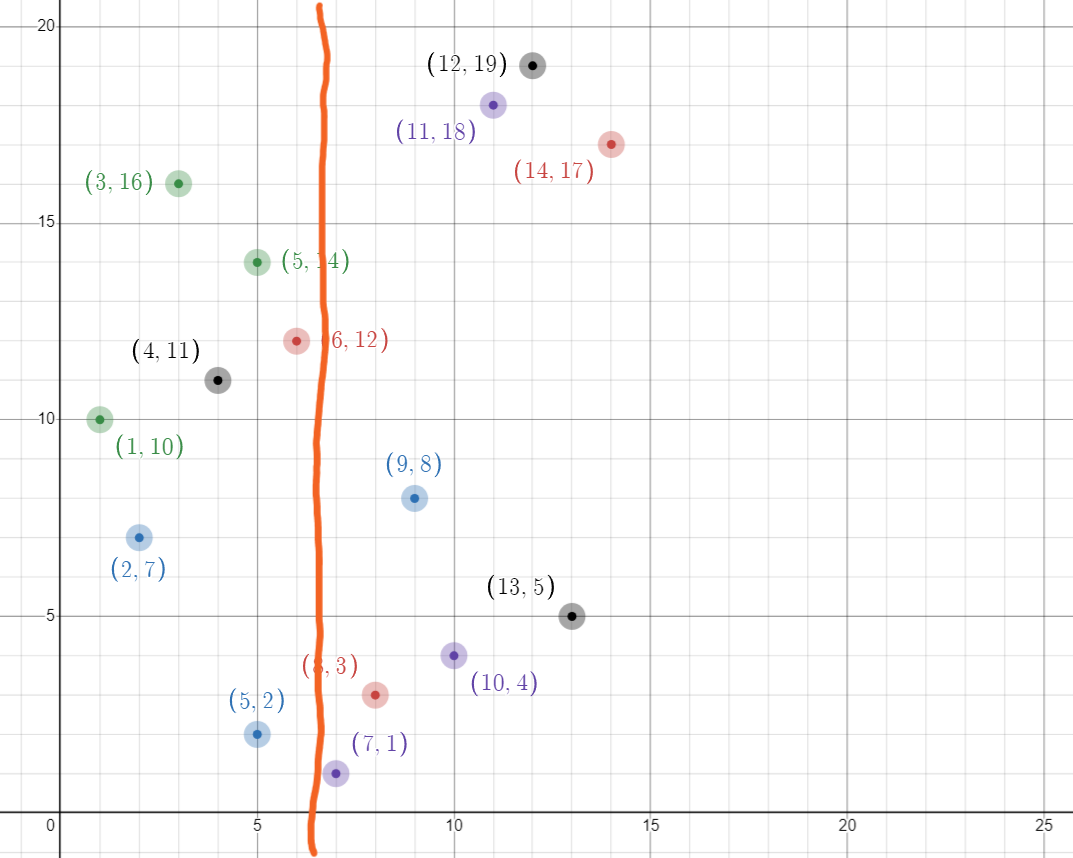

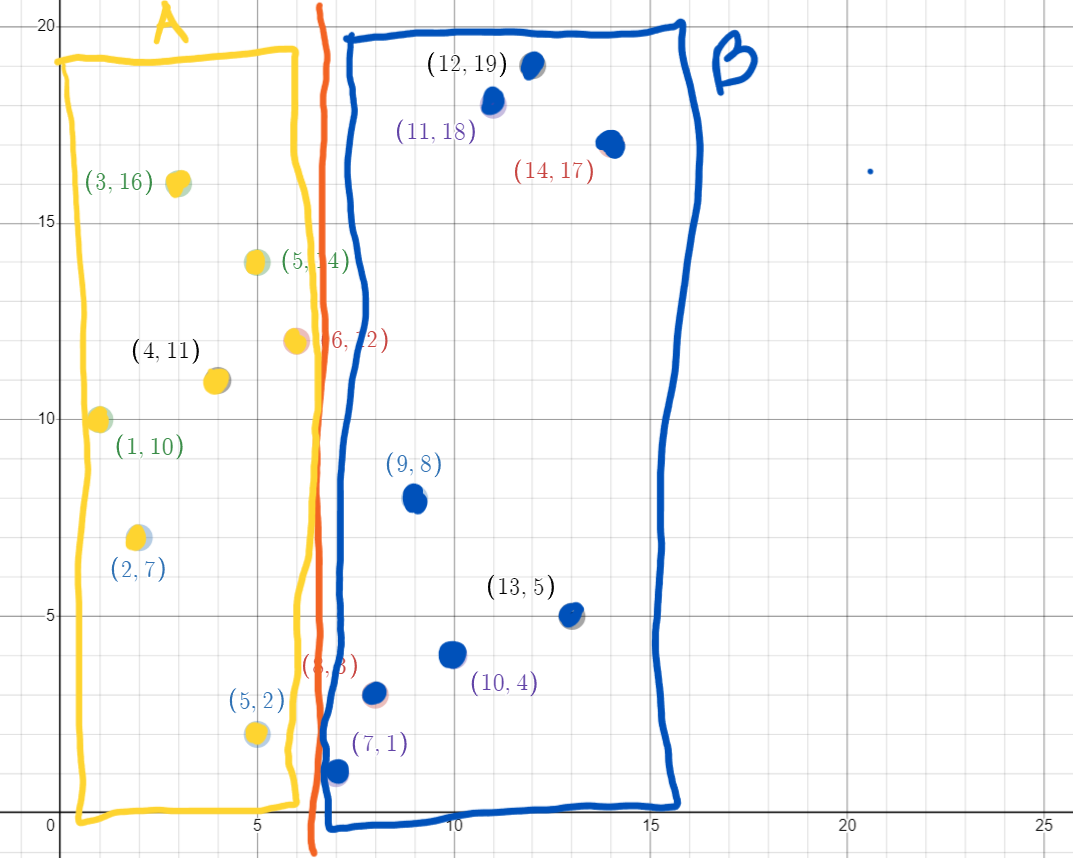

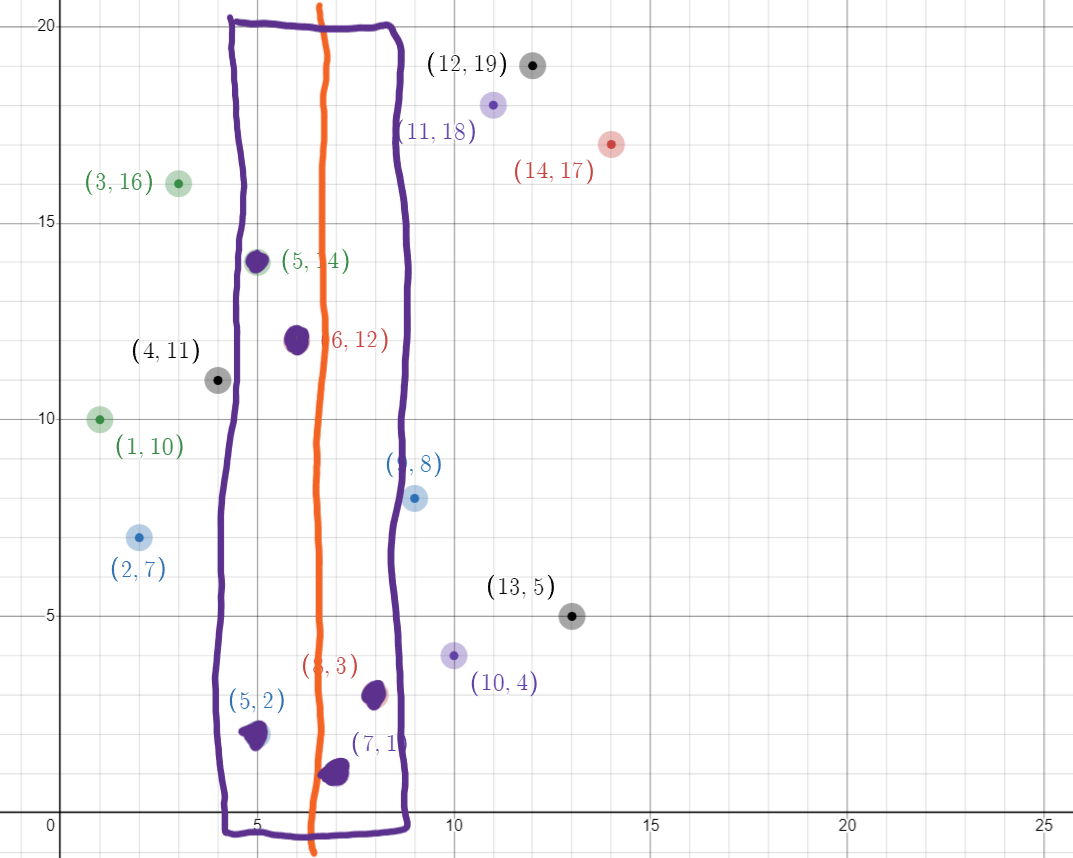

# Code

### Brute Force

In [ ]:
import math

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def closest_pair_brute_force(points):
    min_distance = float('inf')
    p1 = None
    p2 = None

    n = len(points)
    for i in range(n):
        for j in range(i+1, n):
            distance = euclidean_distance(points[i], points[j])
            print(points[i],points[j],distance)
            if distance < min_distance:
                min_distance = distance
                p1 = points[i];
                p2 = points[j];

    return p1, p2, min_distance


### Divide and Conquer

In [ ]:
def dac_closest_pair(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_pair_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]

        ysorted_left = []
        ysorted_right = []
        ysorted_left = [point for point in ysorted if point[0] <= midpoint[0]]
        ysorted_right = [point for point in ysorted if point[0] > midpoint[0]]

        (p1_left, p2_left, delta_left) = dac_closest_pair(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = dac_closest_pair(xsorted_right, ysorted_right)

        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)

        in_area_mid = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]

        for i in range(len(in_area_mid)):
            for j in range(i+1, min(i+7, len(in_area_mid))):
                d = euclidean_distance(in_area_mid[i], in_area_mid[j])
                if d < delta:
                    (p1, p2, delta) = (in_area_mid[i], in_area_mid[j], d)

        return p1, p2, delta


###Main

In [ ]:
def main():
    points = []
    num_points = int(input("Enter the number of points: "))
    for i in range(num_points):
        x, y = map(int, input(f"Enter x and y coordinates of point {i+1}: ").split())
        points.append((x, y))

    b_p1, b_p2, b_min_distance = closest_pair_brute_force(points)
    print("Closest pair (Brute Force):", b_p1, b_p2)
    print("Distance:", b_min_distance)

    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    dac_p1, dac_p2, dac_delta = dac_closest_pair(xsorted, ysorted)
    print("Closest pair (Divide and Conquer):", dac_p1, dac_p2)
    print("Distance:", dac_delta)

if __name__ == "__main__":
    main()

Enter the number of points: 15
Enter x and y coordinates of point 1: 2 7
Enter x and y coordinates of point 2: 5 14
Enter x and y coordinates of point 3: 8 3
Enter x and y coordinates of point 4: 11 18
Enter x and y coordinates of point 5: 13 5
Enter x and y coordinates of point 6: 6 12
Enter x and y coordinates of point 7: 9 8
Enter x and y coordinates of point 8: 3 16
Enter x and y coordinates of point 9: 7 1
Enter x and y coordinates of point 10: 12 19
Enter x and y coordinates of point 11: 1 10
Enter x and y coordinates of point 12: 10 4
Enter x and y coordinates of point 13: 4 11
Enter x and y coordinates of point 14: 14 17
Enter x and y coordinates of point 15: 5 2
(2, 7) (5, 14) 7.615773105863909
(2, 7) (8, 3) 7.211102550927978
(2, 7) (11, 18) 14.212670403551895
(2, 7) (13, 5) 11.180339887498949
(2, 7) (6, 12) 6.4031242374328485
(2, 7) (9, 8) 7.0710678118654755
(2, 7) (3, 16) 9.055385138137417
(2, 7) (7, 1) 7.810249675906654
(2, 7) (12, 19) 15.620499351813308
(2, 7) (1, 10) 3.16

**Input** \\
Number of points = 15 \\
Point 1 : 2 7 \\
Point 2 : 5 14 \\
Point 3 : 8 3 \\
Point 4 : 11 18 \\
Point 5 : 13 5 \\
Point 6 : 6 12 \\
Point 7 : 9 8 \\
Point 8 : 3 16 \\
Point 9 : 7 1 \\
Point 10 : 12 19 \\
Point 11 : 1 10 \\
Point 12 : 10 4 \\
Point 13 : 4 11 \\
Point 14 : 14 17 \\
Point 15 : 5 2 \\

**Output** \\
Closest pair (Brute Force): ((11, 18), (12, 19)) \\
Distance: 1.4142135623730951 \\

Closest pair (Divide and Conquer): (11, 18) (12, 19) \\
Distance: 1.4142135623730951

### SIMULASI PROGRAM DENGAN GRAFIK

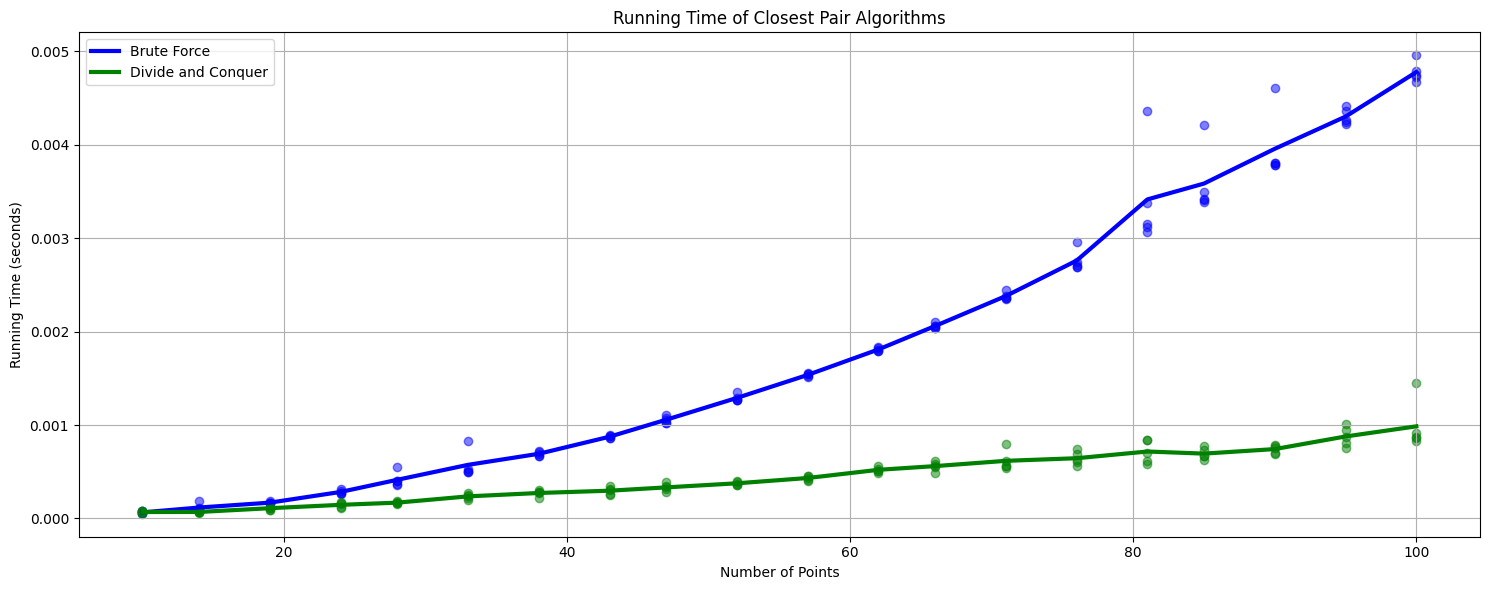

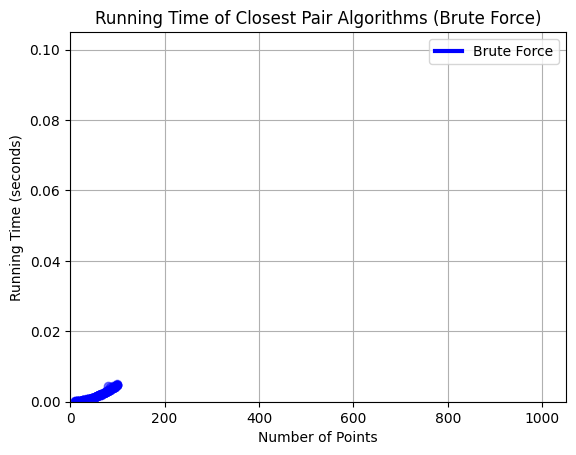

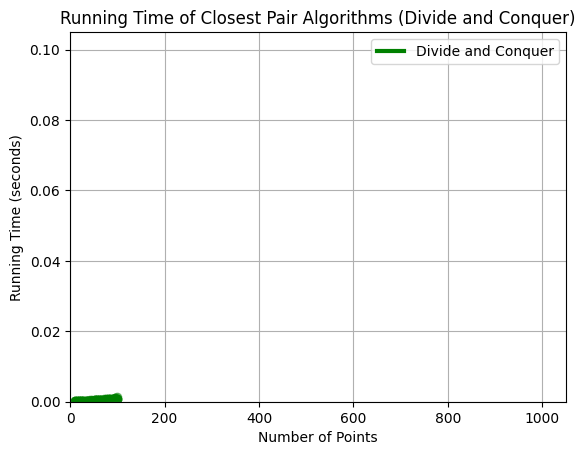

In [ ]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def closest_pair_brute_force(points):
    min_distance = float('inf')
    p1 = None
    p2 = None

    n = len(points)
    for i in range(n):
        for j in range(i+1, n):
            distance = euclidean_distance(points[i], points[j])
            if distance < min_distance:
                min_distance = distance
                p1 = points[i];
                p2 = points[j];

    return p1, p2, min_distance

def dac_closest_pair(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_pair_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]

        ysorted_left = []
        ysorted_right = []
        ysorted_left = [point for point in ysorted if point[0] <= midpoint[0]]
        ysorted_right = [point for point in ysorted if point[0] > midpoint[0]]

        (p1_left, p2_left, delta_left) = dac_closest_pair(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = dac_closest_pair(xsorted_right, ysorted_right)

        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)

        in_area_mid = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]

        for i in range(len(in_area_mid)):
            for j in range(i+1, min(i+7, len(in_area_mid))):
                d = euclidean_distance(in_area_mid[i], in_area_mid[j])
                if d < delta:
                    (p1, p2, delta) = (in_area_mid[i], in_area_mid[j], d)

        return p1, p2, delta


# Fungsi untuk mengukur waktu algoritma brute force
def measure_time_brute_force(num_points, trials):
    total_time = 0
    for _ in range(trials):
        points = [(random.randint(0, 10000), random.randint(0, 10000)) for _ in range(num_points)]
        start_time = time.time()
        closest_pair_brute_force(points)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / trials

# Fungsi untuk mengukur waktu algoritma divide and conquer
def measure_time_dac(num_points, trials):
    total_time = 0
    for _ in range(trials):
        points = [(random.randint(0, 10000), random.randint(0, 10000)) for _ in range(num_points)]
        xsorted = sorted(points, key=lambda point: point[0])
        ysorted = sorted(points, key=lambda point: point[1])
        start_time = time.time()
        dac_closest_pair(xsorted, ysorted)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / trials

# Generate data
num_points_list = np.linspace(10, 100, 20, dtype=int)
trials = 5

plt.figure(figsize=(15, 6))
plt.subplot(1, 1, 1)

# Plot the results for brute force trials
trial_times_brute_force = []
for i in range(trials):
    trial_time = [measure_time_brute_force(num_points, 1) for num_points in num_points_list]
    trial_times_brute_force.append(trial_time)
    plt.scatter(num_points_list, trial_time, color='blue', alpha=0.5)

# Plot the average for brute force
avg_brute_force = [np.mean([trial[i] for trial in trial_times_brute_force]) for i in range(len(num_points_list))]
plt.plot(num_points_list, avg_brute_force, label="Brute Force", color='blue', linewidth=3)

# Plot the results for divide and conquer trials
trial_times_dac = []
for i in range(trials):
    trial_time = [measure_time_dac(num_points, 1) for num_points in num_points_list]
    trial_times_dac.append(trial_time)
    plt.scatter(num_points_list, trial_time, color='green', alpha=0.5)

# Plot the average for divide and conquer
avg_dac = [np.mean([trial[i] for trial in trial_times_dac]) for i in range(len(num_points_list))]
plt.plot(num_points_list, avg_dac, label="Divide and Conquer", color='green', linewidth=3)

plt.xlabel("Number of Points")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time of Closest Pair Algorithms")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the results for brute force trials
for i in range(trials):
    plt.scatter(num_points_list, trial_times_brute_force[i], color='blue', alpha=0.5)

# Plot the average for brute force
plt.plot(num_points_list, avg_brute_force, label="Brute Force", color='blue', linewidth=3)

plt.xlabel("Number of Points")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time of Closest Pair Algorithms (Brute Force)")
plt.legend()
plt.grid(True)
plt.xlim(0, 1050)
plt.ylim(0, 0.1 + max(np.max(trial_times_brute_force), np.max(trial_times_dac)))
plt.show()

# Plot the results for divide and conquer trials

for i in range(trials):
    plt.scatter(num_points_list, trial_times_dac[i], color='green', alpha=0.5)

# Plot the average for divide and conquer
plt.plot(num_points_list, avg_dac, label="Divide and Conquer", color='green', linewidth=3)

plt.xlabel("Number of Points")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time of Closest Pair Algorithms (Divide and Conquer)")
plt.legend()
plt.grid(True)
plt.xlim(0,  1050)
plt.ylim(0, 0.1 + max(np.max(trial_times_brute_force), np.max(trial_times_dac)))
plt.show()
